## Where are School Crossing Guards in San Francisco?
I decided to map out where all the school crossing guards are in San Francisco! Growing up in the city, my grandma (who walked me to and from school) and I were pretty close to our school crossing guard since we saw her at the same intersection every day. In my previous work, I worked for Safe Routes to Schools programs that would also be involved in traffic safety around schools, with parents often communicating that they wanted a crossing guard at specific intersections or wondering how to show their appreciation to them. 

I think in future work with this data, it would be interesting to compare automobile collision locations to crossing guard locations to explore the potential of other crossing guard locations or evaluating the current locations of them.

### Setting up data:

In [4]:
# importing packages
import pandas as pd
import geopandas as gpd

In [5]:
# read and add shapefile to notebook
crossing = gpd.read_file('data/CrossingGuard_shapefile.zip')

In [6]:
# What is the format of the data? 
type(crossing)

geopandas.geodataframe.GeoDataFrame

In [7]:
# First 5 rows of the data frame:
crossing.head()

,objectid,cnn,street1,street2,street3,street4,primary_st,secondary,school_nam,num_guards,...,created_da,last_edite,last_edi_2,date_data_,time_data_,date_dat_2,time_dat_2,analysis_n,supervisor,geometry
0,98,26618000,SCOTT ST,GEARY BLVD,None,None,Scott St,Geary Blvd,Kipp SF Bay Academy,2.0,...,1439409506000,JENWONG,1492791816000,2017-04-21,09:23:36.000,2024-01-18,15:35:28.154,Western Addition,5,MULTIPOINT ((-122.43785 37.78372))
1,101,26619000,SCOTT ST,OFARRELL ST,None,None,Scott St,O'Farrell St,Kipp SF Bay Academy,1.0,...,1439409582000,JENWONG,1492791829000,2017-04-21,09:23:49.000,2024-01-18,15:35:28.154,Western Addition,5,MULTIPOINT ((-122.43763 37.78266))
2,136,26062000,GOLDEN GATE AVE,PIERCE ST,None,None,Pierce,Golden Gate,Gateway Middle School,1.0,...,None,JENWONG,1480701526000,2016-12-02,09:58:46.000,2024-01-18,15:35:28.154,Western Addition,5,MULTIPOINT ((-122.43524 37.77914))
3,142,26047000,PIERCE ST,TURK ST,None,None,Pierce,Turk,Creative Arts Charter,1.0,...,None,JENWONG,1480701519000,2016-12-02,09:58:39.000,2024-01-18,15:35:28.154,Western Addition,5,MULTIPOINT ((-122.43542 37.78008))
4,10,22757000,APTOS AVE,OCEAN AVE,None,None,Aptos,Ocean,Aptos Middle School,2.0,...,None,JENWONG,1439408790000,2015-08-12,12:46:30.000,2024-01-18,15:35:28.154,West of Twin Peaks,7,MULTIPOINT ((-122.46774 37.72833))


In [8]:
# Extracting coordinates from the geometry column (because it's in multipoint format)
coords = crossing.geometry.get_coordinates()

In [9]:
print(coords)

              x          y
0   -122.437848  37.783718
1   -122.437633  37.782663
2   -122.435241  37.779145
3   -122.435425  37.780078
4   -122.467739  37.728329
..          ...        ...
151 -122.397479  37.718834
152 -122.390020  37.719298
153 -122.398556  37.736433
154 -122.379932  37.733381
155 -122.386619  37.732466

[156 rows x 2 columns]


In [10]:
# putting the coordinates in the dataframe 
crossing = crossing.join(coords)
crossing

,objectid,cnn,street1,street2,street3,street4,primary_st,secondary,school_nam,num_guards,...,last_edi_2,date_data_,time_data_,date_dat_2,time_dat_2,analysis_n,supervisor,geometry,x,y
0,98,26618000,SCOTT ST,GEARY BLVD,None,None,Scott St,Geary Blvd,Kipp SF Bay Academy,2.0,...,1492791816000,2017-04-21,09:23:36.000,2024-01-18,15:35:28.154,Western Addition,5,MULTIPOINT ((-122.43785 37.78372)),-122.437848,37.783718
1,101,26619000,SCOTT ST,OFARRELL ST,None,None,Scott St,O'Farrell St,Kipp SF Bay Academy,1.0,...,1492791829000,2017-04-21,09:23:49.000,2024-01-18,15:35:28.154,Western Addition,5,MULTIPOINT ((-122.43763 37.78266)),-122.437633,37.782663
2,136,26062000,GOLDEN GATE AVE,PIERCE ST,None,None,Pierce,Golden Gate,Gateway Middle School,1.0,...,1480701526000,2016-12-02,09:58:46.000,2024-01-18,15:35:28.154,Western Addition,5,MULTIPOINT ((-122.43524 37.77914)),-122.435241,37.779145
3,142,26047000,PIERCE ST,TURK ST,None,None,Pierce,Turk,Creative Arts Charter,1.0,...,1480701519000,2016-12-02,09:58:39.000,2024-01-18,15:35:28.154,Western Addition,5,MULTIPOINT ((-122.43542 37.78008)),-122.435425,37.780078
4,10,22757000,APTOS AVE,OCEAN AVE,None,None,Aptos,Ocean,Aptos Middle School,2.0,...,1439408790000,2015-08-12,12:46:30.000,2024-01-18,15:35:28.154,West of Twin Peaks,7,MULTIPOINT ((-122.46774 37.72833)),-122.467739,37.728329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,61,20467000,LE CONTE AVE,03RD ST,None,None,Le Conte,3rd St,Kipp Bayview Academy,1.0,...,1439408790000,2015-08-12,12:46:30.000,2024-01-18,15:35:28.154,Bayview Hunters Point,10,MULTIPOINT ((-122.39748 37.71883)),-122.397479,37.718834
152,69,20438000,GILMAN AVE,HAWES ST,None,None,Gilman,Hawes,Bret Harte,1.0,...,1439408790000,2015-08-12,12:46:30.000,2024-01-18,15:35:28.154,Bayview Hunters Point,10,MULTIPOINT ((-122.39002 37.7193)),-122.390020,37.719298
153,100,20742000,SILVER AVE,REVERE AVE,None,None,Silver Ave,Revere Ave,Willie L Brown Jr. Middle,2.0,...,1492791522000,2017-04-21,09:18:42.000,2024-01-18,15:35:28.154,Bayview Hunters Point,10,MULTIPOINT ((-122.39856 37.73643)),-122.398556,37.736433
154,107,20061000,HARBOR RD,INGALLS ST,None,None,Harbor,Middlepoint,Malcolm X Academy,1.0,...,1439408790000,2015-08-12,12:46:30.000,2024-01-18,15:35:28.154,Bayview Hunters Point,10,MULTIPOINT ((-122.37993 37.73338)),-122.379932,37.733381


In [11]:
# Renaming x and y columns to longitude and latitude 
crossing = crossing.rename(columns = {'x': 'lon', 'y': 'lat'})
crossing

,objectid,cnn,street1,street2,street3,street4,primary_st,secondary,school_nam,num_guards,...,last_edi_2,date_data_,time_data_,date_dat_2,time_dat_2,analysis_n,supervisor,geometry,lon,lat
0,98,26618000,SCOTT ST,GEARY BLVD,None,None,Scott St,Geary Blvd,Kipp SF Bay Academy,2.0,...,1492791816000,2017-04-21,09:23:36.000,2024-01-18,15:35:28.154,Western Addition,5,MULTIPOINT ((-122.43785 37.78372)),-122.437848,37.783718
1,101,26619000,SCOTT ST,OFARRELL ST,None,None,Scott St,O'Farrell St,Kipp SF Bay Academy,1.0,...,1492791829000,2017-04-21,09:23:49.000,2024-01-18,15:35:28.154,Western Addition,5,MULTIPOINT ((-122.43763 37.78266)),-122.437633,37.782663
2,136,26062000,GOLDEN GATE AVE,PIERCE ST,None,None,Pierce,Golden Gate,Gateway Middle School,1.0,...,1480701526000,2016-12-02,09:58:46.000,2024-01-18,15:35:28.154,Western Addition,5,MULTIPOINT ((-122.43524 37.77914)),-122.435241,37.779145
3,142,26047000,PIERCE ST,TURK ST,None,None,Pierce,Turk,Creative Arts Charter,1.0,...,1480701519000,2016-12-02,09:58:39.000,2024-01-18,15:35:28.154,Western Addition,5,MULTIPOINT ((-122.43542 37.78008)),-122.435425,37.780078
4,10,22757000,APTOS AVE,OCEAN AVE,None,None,Aptos,Ocean,Aptos Middle School,2.0,...,1439408790000,2015-08-12,12:46:30.000,2024-01-18,15:35:28.154,West of Twin Peaks,7,MULTIPOINT ((-122.46774 37.72833)),-122.467739,37.728329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,61,20467000,LE CONTE AVE,03RD ST,None,None,Le Conte,3rd St,Kipp Bayview Academy,1.0,...,1439408790000,2015-08-12,12:46:30.000,2024-01-18,15:35:28.154,Bayview Hunters Point,10,MULTIPOINT ((-122.39748 37.71883)),-122.397479,37.718834
152,69,20438000,GILMAN AVE,HAWES ST,None,None,Gilman,Hawes,Bret Harte,1.0,...,1439408790000,2015-08-12,12:46:30.000,2024-01-18,15:35:28.154,Bayview Hunters Point,10,MULTIPOINT ((-122.39002 37.7193)),-122.390020,37.719298
153,100,20742000,SILVER AVE,REVERE AVE,None,None,Silver Ave,Revere Ave,Willie L Brown Jr. Middle,2.0,...,1492791522000,2017-04-21,09:18:42.000,2024-01-18,15:35:28.154,Bayview Hunters Point,10,MULTIPOINT ((-122.39856 37.73643)),-122.398556,37.736433
154,107,20061000,HARBOR RD,INGALLS ST,None,None,Harbor,Middlepoint,Malcolm X Academy,1.0,...,1439408790000,2015-08-12,12:46:30.000,2024-01-18,15:35:28.154,Bayview Hunters Point,10,MULTIPOINT ((-122.37993 37.73338)),-122.379932,37.733381


In [12]:
# dataframe info
crossing.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   objectid    156 non-null    object        
 1   cnn         156 non-null    object        
 2   street1     156 non-null    object        
 3   street2     156 non-null    object        
 4   street3     7 non-null      object        
 5   street4     1 non-null      object        
 6   primary_st  156 non-null    object        
 7   secondary   156 non-null    object        
 8   school_nam  156 non-null    object        
 9   num_guards  156 non-null    float64       
 10  created_us  22 non-null     object        
 11  created_da  22 non-null     object        
 12  last_edite  156 non-null    object        
 13  last_edi_2  156 non-null    object        
 14  date_data_  156 non-null    datetime64[ms]
 15  time_data_  156 non-null    object        
 16  date_dat_2  156 no

In [13]:
# Number of rows and columns
crossing.shape

(156, 23)

In [14]:
# what are the columns?
crossing.columns.to_list()

['objectid',
 'cnn',
 'street1',
 'street2',
 'street3',
 'street4',
 'primary_st',
 'secondary',
 'school_nam',
 'num_guards',
 'created_us',
 'created_da',
 'last_edite',
 'last_edi_2',
 'date_data_',
 'time_data_',
 'date_dat_2',
 'time_dat_2',
 'analysis_n',
 'supervisor',
 'geometry',
 'lon',
 'lat']

## Setting up Plot

In [15]:
# How many crossing guards are there by neighborhood?
neighbor_count = crossing['analysis_n'].value_counts()
neighbor_count

analysis_n
Mission                           19
Sunset/Parkside                   15
West of Twin Peaks                12
Excelsior                         10
Outer Richmond                     9
Noe Valley                         8
Pacific Heights                    7
Castro/Upper Market                7
Inner Sunset                       6
Chinatown                          6
Bayview Hunters Point              6
Portola                            5
Russian Hill                       5
North Beach                        4
Western Addition                   4
Marina                             4
Bernal Heights                     3
Outer Mission                      3
Hayes Valley                       3
Visitacion Valley                  3
Nob Hill                           3
Lakeshore                          2
Lone Mountain/USF                  2
Inner Richmond                     2
Tenderloin                         2
Potrero Hill                       1
Twin Peaks                 

In [16]:
# What kind of data is in the neighborhood column?
type(neighbor_count)

pandas.core.series.Series

In [17]:
# Converting series into a dataframe:
neighbor_count = neighbor_count.reset_index()
neighbor_count

,analysis_n,count
0,Mission,19
1,Sunset/Parkside,15
2,West of Twin Peaks,12
3,Excelsior,10
4,Outer Richmond,9
5,Noe Valley,8
6,Pacific Heights,7
7,Castro/Upper Market,7
8,Inner Sunset,6
9,Chinatown,6


In [18]:
# current columns as a list
neighbor_count.columns.to_list()

['analysis_n', 'count']

In [19]:
neighbor_count.columns = ['neighborhood', 'count']
neighbor_count.columns

Index(['neighborhood', 'count'], dtype='object')

## Plot of Crossing Guards by Neighborhood

<Axes: title={'center': 'Number of Crossing Guards by Neighborhood'}, xlabel='neighborhood'>

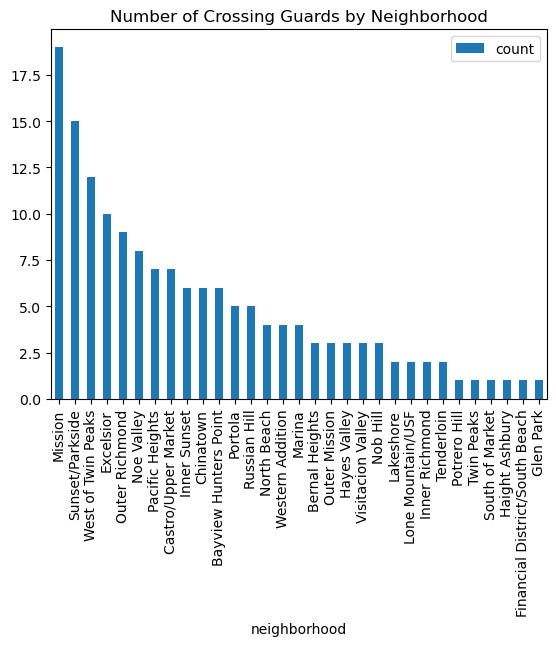

In [20]:
# Bar graph of crossing guards by neighborhood
neighbor_count.plot.bar(x = 'neighborhood', y = 'count', title = 'Number of Crossing Guards by Neighborhood')

## Trimming the Data -- So we can see more relevant details!

In [21]:
# Data so far:
crossing.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   objectid    156 non-null    object        
 1   cnn         156 non-null    object        
 2   street1     156 non-null    object        
 3   street2     156 non-null    object        
 4   street3     7 non-null      object        
 5   street4     1 non-null      object        
 6   primary_st  156 non-null    object        
 7   secondary   156 non-null    object        
 8   school_nam  156 non-null    object        
 9   num_guards  156 non-null    float64       
 10  created_us  22 non-null     object        
 11  created_da  22 non-null     object        
 12  last_edite  156 non-null    object        
 13  last_edi_2  156 non-null    object        
 14  date_data_  156 non-null    datetime64[ms]
 15  time_data_  156 non-null    object        
 16  date_dat_2  156 no

In [22]:
# dataframe with a subset of columns
crossing[['school_nam','num_guards','geometry','analysis_n','supervisor']]

,school_nam,num_guards,geometry,analysis_n,supervisor
0,Kipp SF Bay Academy,2.0,MULTIPOINT ((-122.43785 37.78372)),Western Addition,5
1,Kipp SF Bay Academy,1.0,MULTIPOINT ((-122.43763 37.78266)),Western Addition,5
2,Gateway Middle School,1.0,MULTIPOINT ((-122.43524 37.77914)),Western Addition,5
3,Creative Arts Charter,1.0,MULTIPOINT ((-122.43542 37.78008)),Western Addition,5
4,Aptos Middle School,2.0,MULTIPOINT ((-122.46774 37.72833)),West of Twin Peaks,7
...,...,...,...,...,...
151,Kipp Bayview Academy,1.0,MULTIPOINT ((-122.39748 37.71883)),Bayview Hunters Point,10
152,Bret Harte,1.0,MULTIPOINT ((-122.39002 37.7193)),Bayview Hunters Point,10
153,Willie L Brown Jr. Middle,2.0,MULTIPOINT ((-122.39856 37.73643)),Bayview Hunters Point,10
154,Malcolm X Academy,1.0,MULTIPOINT ((-122.37993 37.73338)),Bayview Hunters Point,10


In [23]:
# Some column names
desired_columns = ['school_nam','num_guards','geometry','analysis_n','supervisor']

In [24]:
crossing_trimmed = crossing[desired_columns].copy()
crossing_trimmed

,school_nam,num_guards,geometry,analysis_n,supervisor
0,Kipp SF Bay Academy,2.0,MULTIPOINT ((-122.43785 37.78372)),Western Addition,5
1,Kipp SF Bay Academy,1.0,MULTIPOINT ((-122.43763 37.78266)),Western Addition,5
2,Gateway Middle School,1.0,MULTIPOINT ((-122.43524 37.77914)),Western Addition,5
3,Creative Arts Charter,1.0,MULTIPOINT ((-122.43542 37.78008)),Western Addition,5
4,Aptos Middle School,2.0,MULTIPOINT ((-122.46774 37.72833)),West of Twin Peaks,7
...,...,...,...,...,...
151,Kipp Bayview Academy,1.0,MULTIPOINT ((-122.39748 37.71883)),Bayview Hunters Point,10
152,Bret Harte,1.0,MULTIPOINT ((-122.39002 37.7193)),Bayview Hunters Point,10
153,Willie L Brown Jr. Middle,2.0,MULTIPOINT ((-122.39856 37.73643)),Bayview Hunters Point,10
154,Malcolm X Academy,1.0,MULTIPOINT ((-122.37993 37.73338)),Bayview Hunters Point,10


## Plotting 
This plot shows there the crossing guards are based on latitude and longitude. It doesn't really tell us too much since it's not overlayed on a map though.

<Axes: >

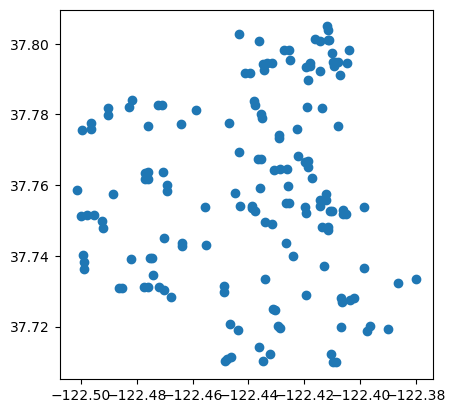

In [25]:
# Simple plot based on latitude/longitude
crossing_trimmed.plot()

In [26]:
crossing_trimmed.geometry

0      MULTIPOINT ((-122.43785 37.78372))
1      MULTIPOINT ((-122.43763 37.78266))
2      MULTIPOINT ((-122.43524 37.77914))
3      MULTIPOINT ((-122.43542 37.78008))
4      MULTIPOINT ((-122.46774 37.72833))
                      ...                
151    MULTIPOINT ((-122.39748 37.71883))
152     MULTIPOINT ((-122.39002 37.7193))
153    MULTIPOINT ((-122.39856 37.73643))
154    MULTIPOINT ((-122.37993 37.73338))
155    MULTIPOINT ((-122.38662 37.73247))
Name: geometry, Length: 156, dtype: geometry

## Creating a Map using Folium
Here, I use folium to create a map with markers to display the locations of every school crossing guard in San Francisco. First, I took the average of the latitude and longitude to center the map, then overlayed the markers on top of a map of San Francisco. 

In [27]:
import folium

In [28]:
# average latitude
latitude = crossing.lat.mean()
latitude

np.float64(37.75839068847436)

In [29]:
# average longitude
longitude = crossing.lon.mean()
longitude

np.float64(-122.43874941792309)

In [30]:
# first, note how to loop through a dataframe:
for index, row in crossing.iterrows():
    print(row.school_nam, row.lon, row.lat)

Kipp SF Bay Academy -122.437847943 37.783717638
Kipp SF Bay Academy -122.437633454 37.7826629
Gateway Middle School -122.435241012 37.779144878
Creative Arts Charter -122.435424515 37.780077638
Aptos Middle School -122.467739341 37.728329066
West Portal Lutheran -122.474118906 37.734568247
St. Brendan -122.455271075 37.743048665
Hoover Middle School -122.470365299 37.745158994
West Portal Elementary -122.463685995 37.74374941
Sunnyside -122.448854952 37.729882308
Commodore-Sloat -122.470110426 37.730308468
West Portal Elementary -122.463803959 37.742927256
Commodore-Sloat -122.472160324 37.731205504
St. Cecilia -122.474364585 37.739371372
St. Cecilia -122.475409075 37.739325433
SunnySide/St. Finn Barr -122.448866265 37.73154296
Visitacion Valley -122.410640794 37.712206222
Our Lady of the Visitacion -122.409583755 37.710109208
Our Lady of the Visitacion -122.408639026 37.709844111
Rooftop Alternative -122.443013013 37.754013595
Bessie Carmichael -122.40784206 37.776746109
Starr King -1

### Map with markers

In [31]:
m = folium.Map(location=[37.75839068847436,-122.43874941792309], zoom_start = 12.4)
m
for index, row in crossing.iterrows():
    # add folium marker code
    folium.Marker([row.lat, row.lon], popup=row.school_nam, tooltip=row.school_nam).add_to(m)
m